In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Cargamos datos

In [2]:
import pandas as pd
data = pd.read_csv('data/alturas-pesos.csv')
print(data)

      Genero  Peso  Altura
0     Hombre   109     187
1     Hombre    73     174
2     Hombre    96     188
3     Hombre    99     182
4     Hombre    93     177
5     Hombre    69     170
6     Hombre    83     174
7     Hombre    76     173
8     Hombre    79     170
9     Hombre    70     161
10    Hombre    84     180
11    Hombre    96     181
12    Hombre    75     164
13    Hombre    85     175
14    Hombre    84     175
15    Hombre    78     171
16    Hombre    88     183
17    Hombre    78     162
18    Hombre    84     176
19    Hombre    82     172
20    Hombre    78     172
21    Hombre    89     176
22    Hombre    67     168
23    Hombre   103     191
24    Hombre    73     172
25    Hombre    87     173
26    Hombre    83     175
27    Hombre    93     184
28    Hombre    79     171
29    Hombre    70     173
...      ...   ...     ...
9970   Mujer    68     166
9971   Mujer    70     164
9972   Mujer    55     154
9973   Mujer    54     154
9974   Mujer    64     166
9

In [3]:
alturas = data['Altura'].values
pesos = data['Peso'].values
tuples_list = [(p, alturas[i]) for i, p in enumerate(pesos)]

In [11]:
from collections import Counter
frec_conjunta = Counter(tuples_list)
frec_alturas = Counter(alturas)
frec_pesos = Counter(pesos)
espacio_muestral_alturas = np.sort(list(frec_alturas.keys()))
espacio_muestral_pesos = np.sort(list(frec_pesos.keys()))

## Graficamos conjunta

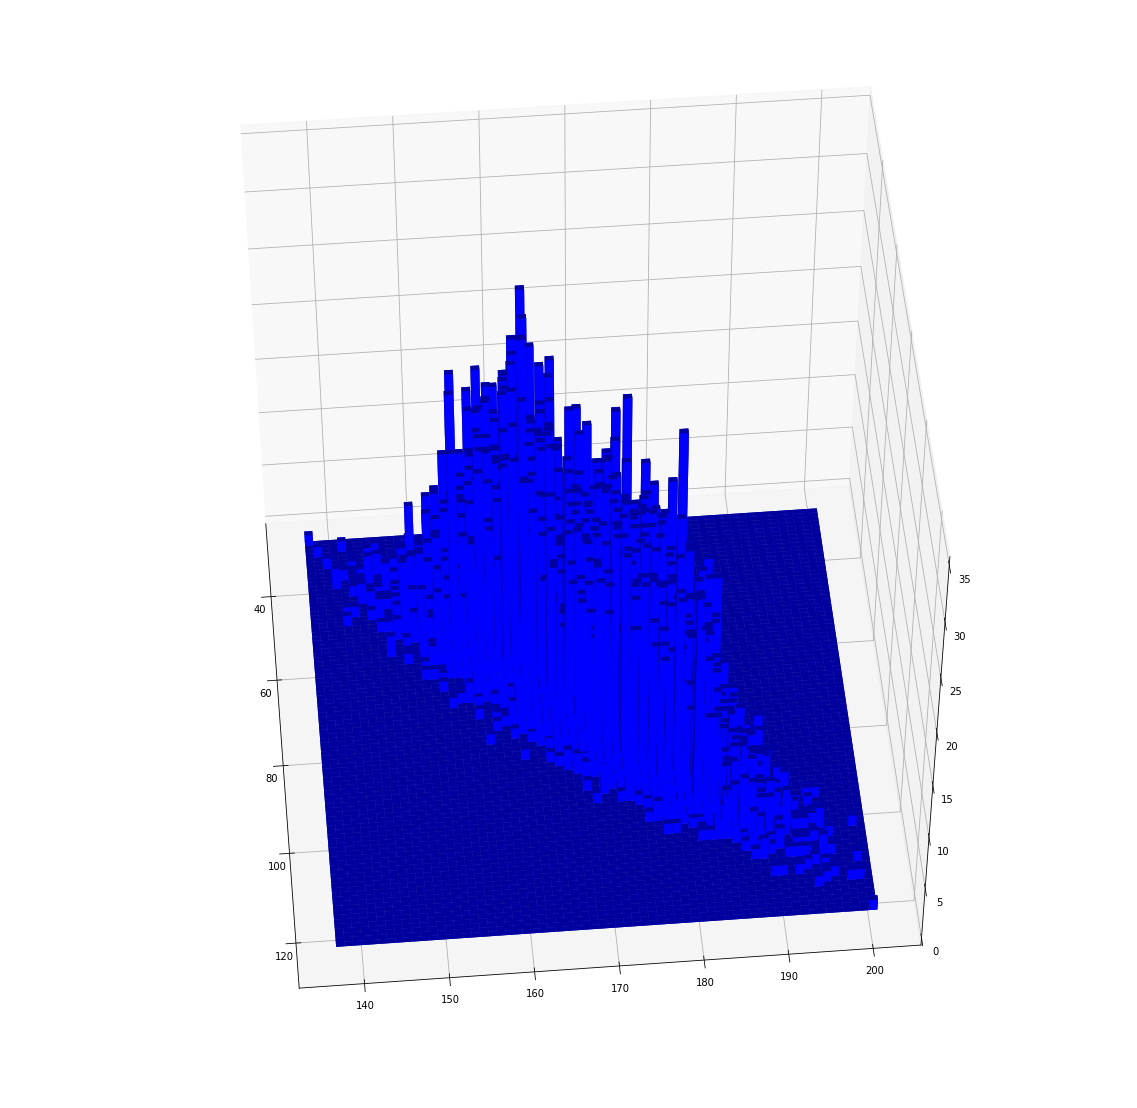

In [8]:
from helper import plot_joint_3d 
conjunta_np = plot_joint_3d(frec_conjunta, az=50, el=-5)
plt.show()

### Analizamos la conjunta

In [12]:
a_min = espacio_muestral_alturas[0]
a_max = espacio_muestral_alturas[-1]
p_min = espacio_muestral_pesos[0]
p_max = espacio_muestral_pesos[-1]
peso_i = 30
peso_w = 30
alt_i = 20
alt_w = 23
print('\t', end='')
for i in range(alt_w):
    print(str(i+alt_i+a_min), end=' ')
print()
for i, row in enumerate(conjunta_np[peso_i:peso_i+peso_w, alt_i:alt_i+alt_w]):
    print(i+p_min+peso_i, end='\t')
    for j in row.astype(int):
        print('{0:3d}'.format(j), end=' ')
    print()

	157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 
59	 21  21  19  26  25  19  20  11   8   3   5   2   3   1   0   0   0   0   0   0   0   0   0 
60	 24  26  19  27  30  30  17  12   9   5   4   4   1   2   0   0   0   0   0   0   0   0   0 
61	 10  14  17  26  29  15  22  22  14  14   4   2   2   2   0   0   0   0   0   0   0   0   0 
62	 21  18  21  20  23  35  30  22  22  16   7  10   4   1   1   1   1   0   0   0   0   0   0 
63	  6  14  10  28  14  31  24  17  23  21  13  11   2   4   1   0   0   0   0   0   0   0   0 
64	  9  11  17  21  11  26  24  29  28  15  15  15   8   4   1   3   0   0   0   0   0   0   0 
65	  7  12  12  13  21  19  21  26  24  22  11  13   8   5   4   1   3   0   0   0   0   0   0 
66	  5   7   9   5  13  34  20  23  24  23  11  14  13   7   6   4   1   0   1   0   0   0   0 
67	  5   6   6   9   8  20  17  26  27  14  12  19  11   7   4   4   2   1   0   0   0   0   0 
68	  1   3   7   3   8  10  13  23  31  21

Recordemos que esta sin normalizar y tendría que dividir por 10.000

## Marginales

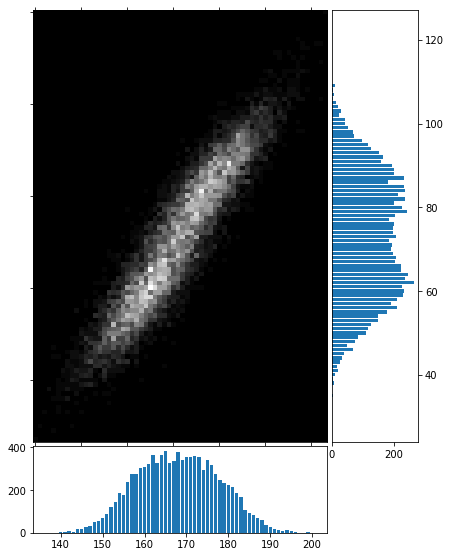

In [13]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frec_conjunta)

### Frecuencias de pesos (independientemente de la altura)

Notar que la calculo haciendo la suma en axis=1

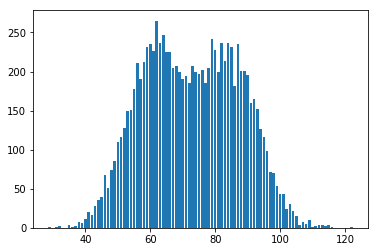

In [14]:
plt.bar(range(conjunta_np.shape[0]) + p_min, conjunta_np.sum(axis=1))
plt.show()

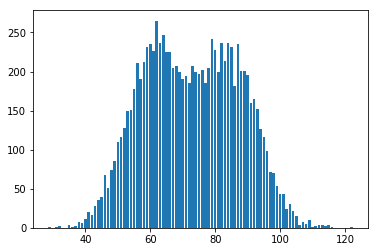

In [22]:
plt.bar(frec_pesos.keys(), frec_pesos.values())
plt.show()

Si quiero probabilidad por cuanto divido?

por 10000, igual que la conjunta. Notar que estimo una mucho menor cantidad de probabiliades que en la conjunta con la misma cantidad de mediciones (10000)

### Frecuencias de alturas (independientemente de los pesos)

Notar que la calculo haciendo la suma en axis=0

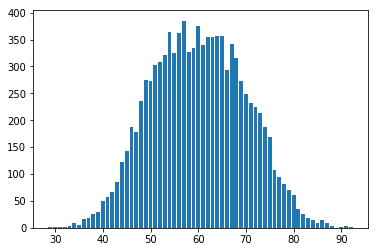

In [68]:
plt.bar(range(conjunta_np.shape[1]) + p_min, conjunta_np.sum(axis=0))
plt.show()

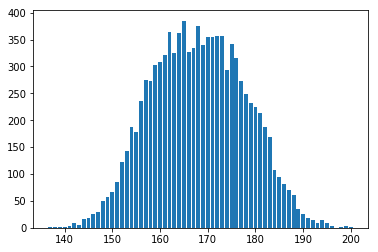

In [24]:
plt.bar(frec_alturas.keys(), frec_alturas.values())
plt.show()

## Condicionales

In [62]:
conjunta_np_norm = conjunta_np/10000

In [63]:
conjunta_np_norm.sum()

1.0

Frecuencia de alturas dado que pesaba 60kg

In [59]:
indice_pesos = 60 - p_min
conjunta_np_norm[indice_pesos]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0002, 0.0001,
       0.0004, 0.0002, 0.0004, 0.0012, 0.0024, 0.0026, 0.0019, 0.0027,
       0.003 , 0.003 , 0.0017, 0.0012, 0.0009, 0.0005, 0.0004, 0.0004,
       0.0001, 0.0002, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

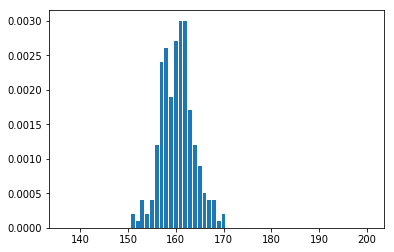

In [60]:
plt.bar(range(conjunta_np.shape[1]) + a_min, conjunta_np_norm[indice_pesos])
plt.show()

In [61]:
conjunta_np_norm[indice_pesos].sum()

0.0235

por cuanto divido para normalizar:

No es por 10.000 en este caso si no por la suma de esa fila

## Normalizando

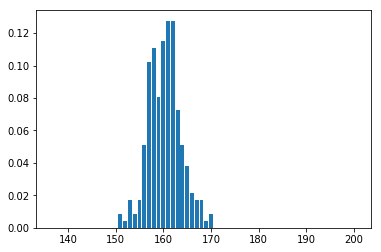

In [65]:
plt.bar(range(conjunta_np.shape[1]) + a_min, conjunta_np_norm[indice_pesos]/conjunta_np_norm[indice_pesos].sum())
plt.show()

\begin{equation}
P(Altura =  161\ |\ Peso = 60kg) = \frac{N_{A=161, P=60}}{N_{P=60}} = \frac{N_{A=161, P=60}/N}{N_{P=60}/N}
\end{equation}

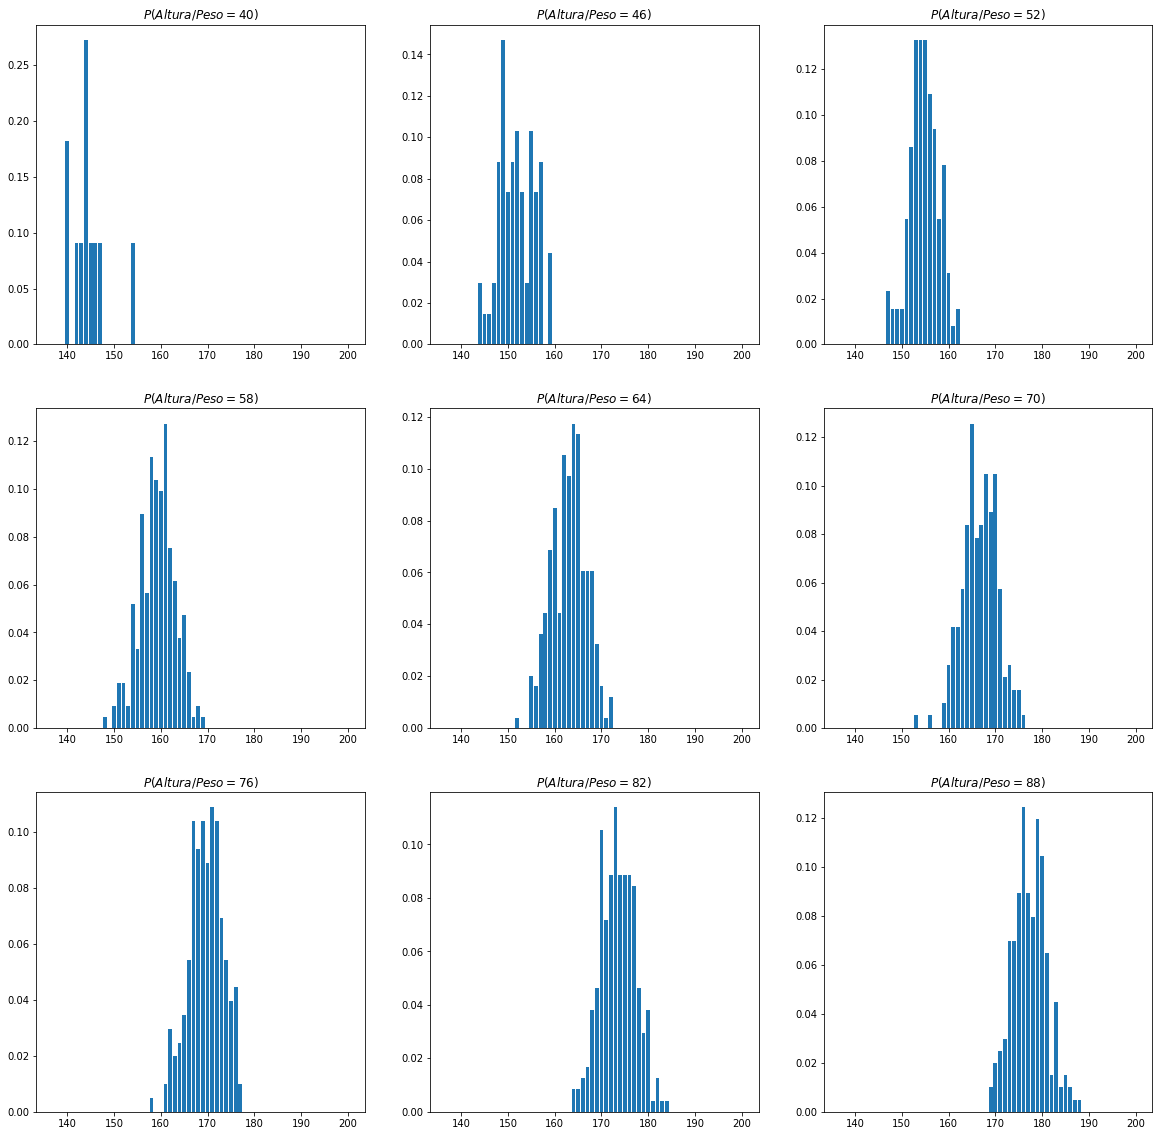

In [66]:
f, ax = plt.subplots(3, 3, figsize=(20,20))
ax = ax.reshape(-1)
for delta in range(9):
    peso = 40 + delta*6
    indice_pesos = peso - p_min
    conjunta_np[indice_pesos]
    ax[delta].bar(range(conjunta_np.shape[1]) + a_min, conjunta_np[indice_pesos]/conjunta_np[indice_pesos].sum())
    ax[delta].set_title('$P(Altura/Peso=%d)$'%peso)
plt.show()